# Cointegration Test in Python

If a portfolio is stationary & the portfolio consists of two or more instruments. Then, the instruments in the portfolio are said to be cointegrated.

Lets consider two stocks X & Y
Hedge Ratio Linear regression X & Y
Spread Y - Hedge Ratio*X
Stationarity Test on Spread

In [1]:
#Get the data
import pandas as pd

In [5]:
x=pd.read_csv(r"C:\Users\shaky\Downloads\X.csv",index_col=0)['Adj Close']
y=pd.read_csv(r"C:\Users\shaky\Downloads\Y.csv",index_col=0)['Adj Close']
df=pd.concat([y,x],axis=1)
df.columns=['Y','X']
df.head()

,Y,X
Date,,
02-01-2015,27.024069,19.254818
05-01-2015,26.298779,19.071854
06-01-2015,25.912586,18.993441
07-01-2015,25.940847,19.167692
08-01-2015,26.261103,19.420359


In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

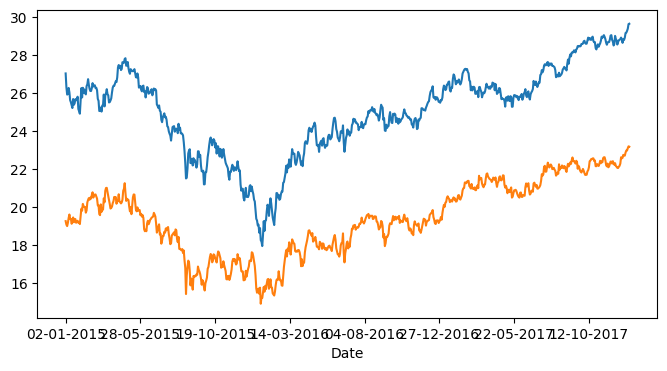

In [8]:
df.Y.plot(figsize=(8,4))
df.X.plot(figsize=(8,4))
plt.show()

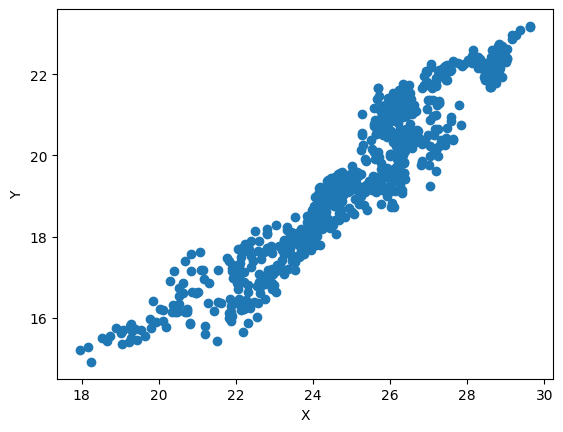

In [9]:
#To see it how it's looks on the scatter plot
plt.scatter(df.Y,df.X)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
#Calculate the Hedge Ratio
import statsmodels.api as sm
model = sm.OLS(df.Y.iloc[:90], df.X.iloc[:90])
model = model.fit()
print(model.params[0])

1.307806776293932


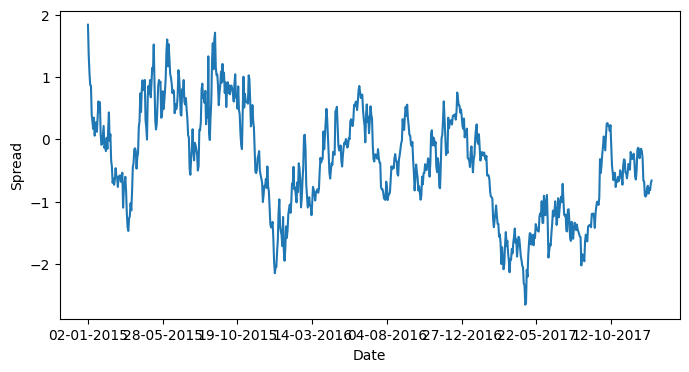

In [12]:
df['spread'] = df.Y - model.params[0]*df.X
#Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [13]:
#Now let's check the ADF Test
from statsmodels.tsa.stattools import adfuller
adf=adfuller(df.spread, maxlag=1)
adf[0]

-4.117852561797965

In [14]:
adf[4]

{'1%': -3.439052522969989,
 '5%': -2.8653808299915013,
 '10%': -2.5688152592363274}

In [15]:
#Conclusoin as p-value is < critical value at 99% so our portfolio is stationary